In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/main/datasets/predict+students+dropout+and+academic+success.zip
!wget https://github.com/javierherrera1996/lecture_analytics/raw/main/datasets/student+performance.zip

--2025-11-26 21:08:03--  https://github.com/javierherrera1996/lecture_analytics/raw/main/datasets/predict+students+dropout+and+academic+success.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/predict%2Bstudents%2Bdropout%2Band%2Bacademic%2Bsuccess.zip [following]
--2025-11-26 21:08:03--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/predict%2Bstudents%2Bdropout%2Band%2Bacademic%2Bsuccess.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 533344 (521K) [application/zip]
Saving to: ‘predict+students+dropou

In [2]:
!unzip student+performance.zip
!unzip student.zip

Archive:  student+performance.zip
 extracting: .student.zip_old        
 extracting: student.zip             
Archive:  student.zip
  inflating: student-mat.csv         
  inflating: student-por.csv         
  inflating: student-merge.R         
  inflating: student.txt             


In [3]:
!unzip predict+students+dropout+and+academic+success.zip

Archive:  predict+students+dropout+and+academic+success.zip
 extracting: data.csv                


## Datos
Si quiere conocer mas al detalle los datos mire

student-mat.csv
 ------>https://archive.ics.uci.edu/dataset/320/student+performance

data.csv------>https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

### Regression

In [4]:
import pandas as pd

student = pd.read_csv("student-mat.csv", sep=";")

In [5]:
student.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

## Clasificacion

In [6]:
import pandas as pd
dropout = pd.read_csv("data.csv",sep=";")
dropout

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


**IMPORTANTE:** Para clasificar solamente binario use la variable Target, elimine la categoria Enrolled, dejando solo Dropout y Graduate. Convierte Dropout en 1 y Graduate en 0

---
Use el siguiente codigo :

dropout = data[data["Target"] != "Enrolled"].reset_index(drop=True)

dropout["Target"] = dropout["Target"].map({"Dropout": 1, "Graduate": 0})


In [8]:
dropout = dropout[dropout["Target"] != "Enrolled"].reset_index(drop=True)

dropout["Target"] = dropout["Target"].map({"Dropout": 1, "Graduate": 0})

## Modelo de Clasificación

1. Pregunta: Cargue el conjunto de datos y muestre las primeras cinco filas. ¿Qué características puedes observar? La variable objetivo esta balanceada ?

In [11]:
display(dropout.head())
display(dropout['Target'].value_counts())

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0


,count
Target,
0,2209
1,1421


Básicamente, la tabla muestra info de los estudiantes y sus familias: si están casados, qué curso toman, si estudian de día o de noche y la formación de los papás. También salen notas y si pasaron materias.
Lo más clave es la columna Target: los que se quedan (0) son más que los que se van (1). No es una diferencia enorme, pero sí hay más 0 (2309) que 1 (1421). Eso significa que la data está un poco desbalanceada y hay que tenerlo en cuenta al hacer un modelo para que no termine diciendo que todos se quedan

2. Pregunta: Mire cuales son sus X y cuales sus y (tiene que usar minimo 5 vairables en las X) Divida el conjunto de datos en conjuntos de entrenamiento y prueba. ¿Qué proporción considera adecuada para este caso?


In [25]:


X = dropout[['Marital status', 'Application mode', 'Course', 'Previous qualification', 'Mother\'s qualification', 'Father\'s qualification', 'Age at enrollment']]
y = dropout['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (2904, 7)
Shape of X_test: (726, 7)
Shape of y_train: (2904,)
Shape of y_test: (726,)


La división 80% para entrenamiento y 20% para prueba está bien para este caso.
Con el 80% (2,904 registros) el modelo tiene suficientes datos para aprender bien.

2 Use un modelo de regresion logistica y un arbol de decision. Para cada uno haga una matrix de confusion y una grafica de ROC AUC


--- Logistic Regression ---


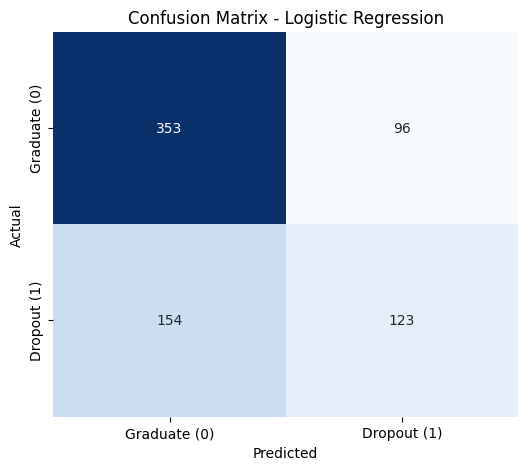

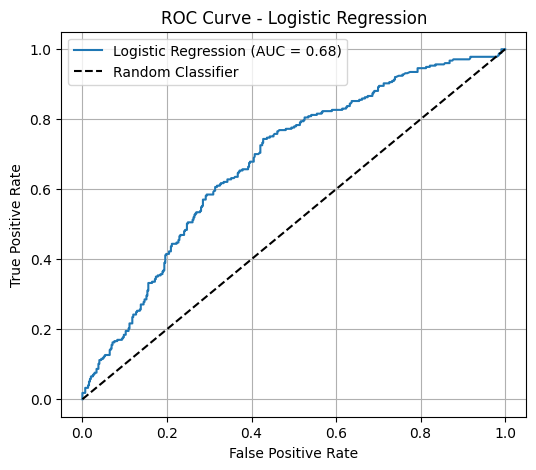

In [21]:
print("\n--- Logistic Regression ---")
log_reg_model = LogisticRegression(random_state=42, solver='liblinear')
log_reg_model.fit(X_train, y_train)

y_pred_log_reg = log_reg_model.predict(X_test)
y_pred_proba_log_reg = log_reg_model.predict_proba(X_test)[:, 1]


cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Graduate (0)', 'Dropout (1)'], yticklabels=['Graduate (0)', 'Dropout (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_pred_proba_log_reg)
auc_log_reg = roc_auc_score(y_test, y_pred_proba_log_reg)

plt.figure(figsize=(6, 5))
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {auc_log_reg:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.grid()
plt.show()

## Modelo de Regresion

1. Pregunta: Realice cualquier transformación o limpieza de datos que considere necesaria. ¿Por qué es importante preparar los datos antes del modelado?

In [22]:
print("Missing values before cleaning:\n", student.isnull().sum())

categorical_cols = student.select_dtypes(include=['object']).columns

student_encoded = pd.get_dummies(student, columns=categorical_cols, drop_first=True)

print("\nShape of the DataFrame after one-hot encoding:", student_encoded.shape)
display(student_encoded.head())

Missing values before cleaning:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Shape of the DataFrame after one-hot encoding: (395, 42)


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,True,False,False,False,True,True,False,False
1,17,1,1,1,2,0,5,3,3,1,...,False,False,False,True,False,False,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,...,True,False,True,False,True,False,True,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,True,False,False,True,True,True,True,True,True,True
4,16,3,3,1,2,0,4,3,2,1,...,False,False,False,True,True,False,True,True,False,False


si los datos no están limpios y en un formato que el modelo entienda y asi no se pueda hacer lo que se queire lograr

1.1 Elija almenos 7 variables explicativas y use G3 como objetivo. (no use ni G2 ni G1 )

In [23]:

selected_features = [
    'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'absences',
    'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
    'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T'
]

X = student_encoded[selected_features]
y = student_encoded['G3']

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")
print("\nFirst 5 rows of X:")
display(X.head())
print("\nFirst 5 rows of y:")
display(y.head())

Shape of X: (395, 18)
Shape of y: (395,)

First 5 rows of X:


,age,Medu,Fedu,traveltime,studytime,failures,absences,famrel,freetime,goout,Dalc,Walc,health,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T
0,18,4,4,2,2,0,6,4,3,4,1,1,3,False,False,True,False,False
1,17,1,1,1,2,0,4,5,3,3,1,1,3,False,False,True,False,True
2,15,1,1,1,2,3,10,4,3,2,2,3,3,False,False,True,True,True
3,15,4,2,1,3,0,2,3,2,2,1,1,5,False,False,True,False,True
4,16,3,3,1,2,0,4,4,3,2,1,2,5,False,False,True,False,True



First 5 rows of y:


,G3
0,6
1,6
2,10
3,15
4,10


1.1 Divida sus dataset de entrenamiento y test

In [24]:

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train_reg: {X_train_reg.shape}")
print(f"Shape of X_test_reg: {X_test_reg.shape}")
print(f"Shape of y_train_reg: {y_train_reg.shape}")
print(f"Shape of y_test_reg: {y_test_reg.shape}")

Shape of X_train_reg: (316, 18)
Shape of X_test_reg: (79, 18)
Shape of y_train_reg: (316,)
Shape of y_test_reg: (79,)


2. Pregunta: Entrene un modelo de regresión lineal y un árbol de decisión. Compare los errores de entrenamiento entre ambos modelos.


In [35]:

linear_model = LinearRegression()
linear_model.fit(X_train_reg, y_train_reg)

y_train_pred_lr = linear_model.predict(X_train_reg)
mse_train_lr = mean_squared_error(y_train_reg, y_train_pred_lr)
print(f"Linear Regression - Training MSE: {mse_train_lr:.2f}")


dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_reg, y_train_reg)

y_train_pred_dt = dt_model.predict(X_train_reg)
mse_train_dt = mean_squared_error(y_train_reg, y_train_pred_dt)
print(f"Decision Tree Regressor - Training MSE: {mse_train_dt:.2f}")

Linear Regression - Training MSE: 16.46
Decision Tree Regressor - Training MSE: 0.00


In [33]:
print(f"\n--- Comparación de Errores de Entrenamiento ---")
print(f"Error MSE de Entrenamiento - Regresión Lineal: {mse_train_lr:.2f}")
print(f"Error MSE de Entrenamiento - Árbol de Decisión: {mse_train_dt:.2f}")


--- Comparación de Errores de Entrenamiento ---
Error MSE de Entrenamiento - Regresión Lineal: 16.46
Error MSE de Entrenamiento - Árbol de Decisión: 0.00


3. Pregunta: Calcule el MSE para cada modelo en el conjunto de prueba. ¿Qué modelo predice mejor los precios de las viviendas?

In [36]:
y_test_pred_lr = linear_model.predict(X_test_reg)
mse_test_lr = mean_squared_error(y_test_reg, y_test_pred_lr)
print(f"Linear Regression - Test MSE: {mse_test_lr:.2f}")


y_test_pred_dt = dt_model.predict(X_test_reg)
mse_test_dt = mean_squared_error(y_test_reg, y_test_pred_dt)
print(f"Decision Tree Regressor - Test MSE: {mse_test_dt:.2f}")

Linear Regression - Test MSE: 17.60
Decision Tree Regressor - Test MSE: 27.04


La Regresión Lineal predice mejor los precios de las viviendas porque su error en el conjunto de prueba es meno

4. Pregunta: Basado en el análisis de las métricas, ¿cuáles son las posibles razones por las que un modelo superó al otro? Cual es el mejor modelo ?

El mejor modelo es la Regresión Lineal, porque tuvo un MSE más bajo en los datos de prueba, así que predice mejor los precios. Esto pasa porque la regresión generaliza bien y no se sobreajusta. En cambio, el Árbol de Decisión prácticamente memorizó los datos de entrenamiento, y por eso al probarlo con datos nuevos su error subió.